## Diabetes Prediction

### Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Exploratory Data Analysis (EDA)

In [31]:
import pandas as pd
import numpy as np

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


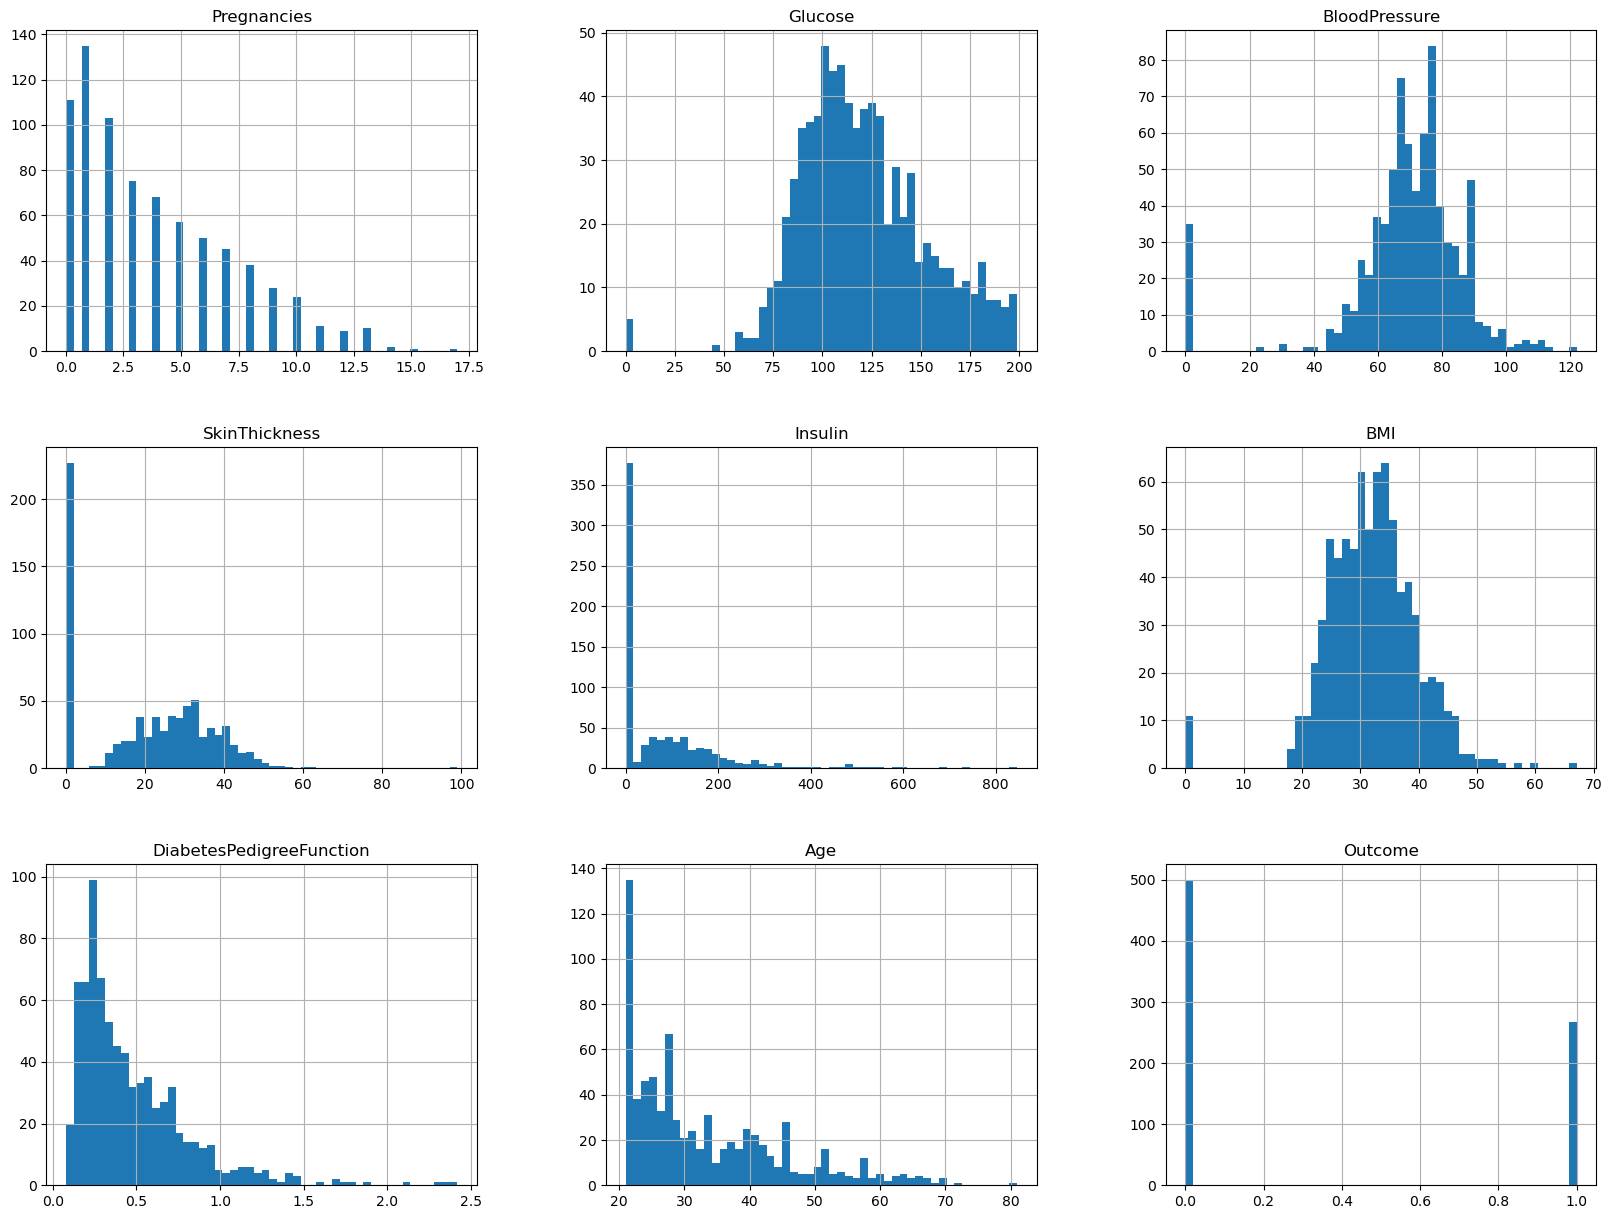

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize = (20,15))
plt.show()

In [34]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

There are no missing data but from the overview but from the histogram, we can see there are alot of data with zero values. values like Glucose, BloodPressure, SkinThickness, Insulin, and BMI being zero are often indicators of missing data rather than actual zero values in a medical context. Below are the missing value rate for the columns in descending order:

In [35]:
df_zero = df.drop(['Pregnancies','DiabetesPedigreeFunction','Age','Outcome'], axis=1)

Missing rate:

In [36]:
print("Percentage of zeros in all columns: ")
((df_zero== 0).sum(axis=0)/len(df)*100).sort_values(ascending = False)

Percentage of zeros in all columns: 


Insulin          48.697917
SkinThickness    29.557292
BloodPressure     4.557292
BMI               1.432292
Glucose           0.651042
dtype: float64

#### Handle Missing/Zero Values

Some features (e.g., Glucose=0, BMI=0) having 0 values are biologically impossible but pregnancy with value 0 will be retained. So the 0 value representing the missing values in other columns is abit ambiguous. So in this case we will convert the 0 to NaN values because 
np.nan is the universal standard for representing missing data in NumPy and Pandas, which scikit-learn heavily relies on. Using np.nan ensures compatibility with virtually all scikit-learn preprocessing and modeling tools without ambiguity.


In [37]:
print('These are the columns that we are doing imputing : {}'.format(df_zero.columns.values))

These are the columns that we are doing imputing : ['Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI']


In [38]:
# Columns to impute
cols = df_zero.columns

# Replace zeros with NaN and then fill with column means
df[cols] = df[cols].replace(0, np.nan).fillna(df[cols].mean())

In [39]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


Below is a pairplot visualizing the relationships between each pair of features, with points colored by the 'Outcome' variable, to explore potential correlations and patterns.

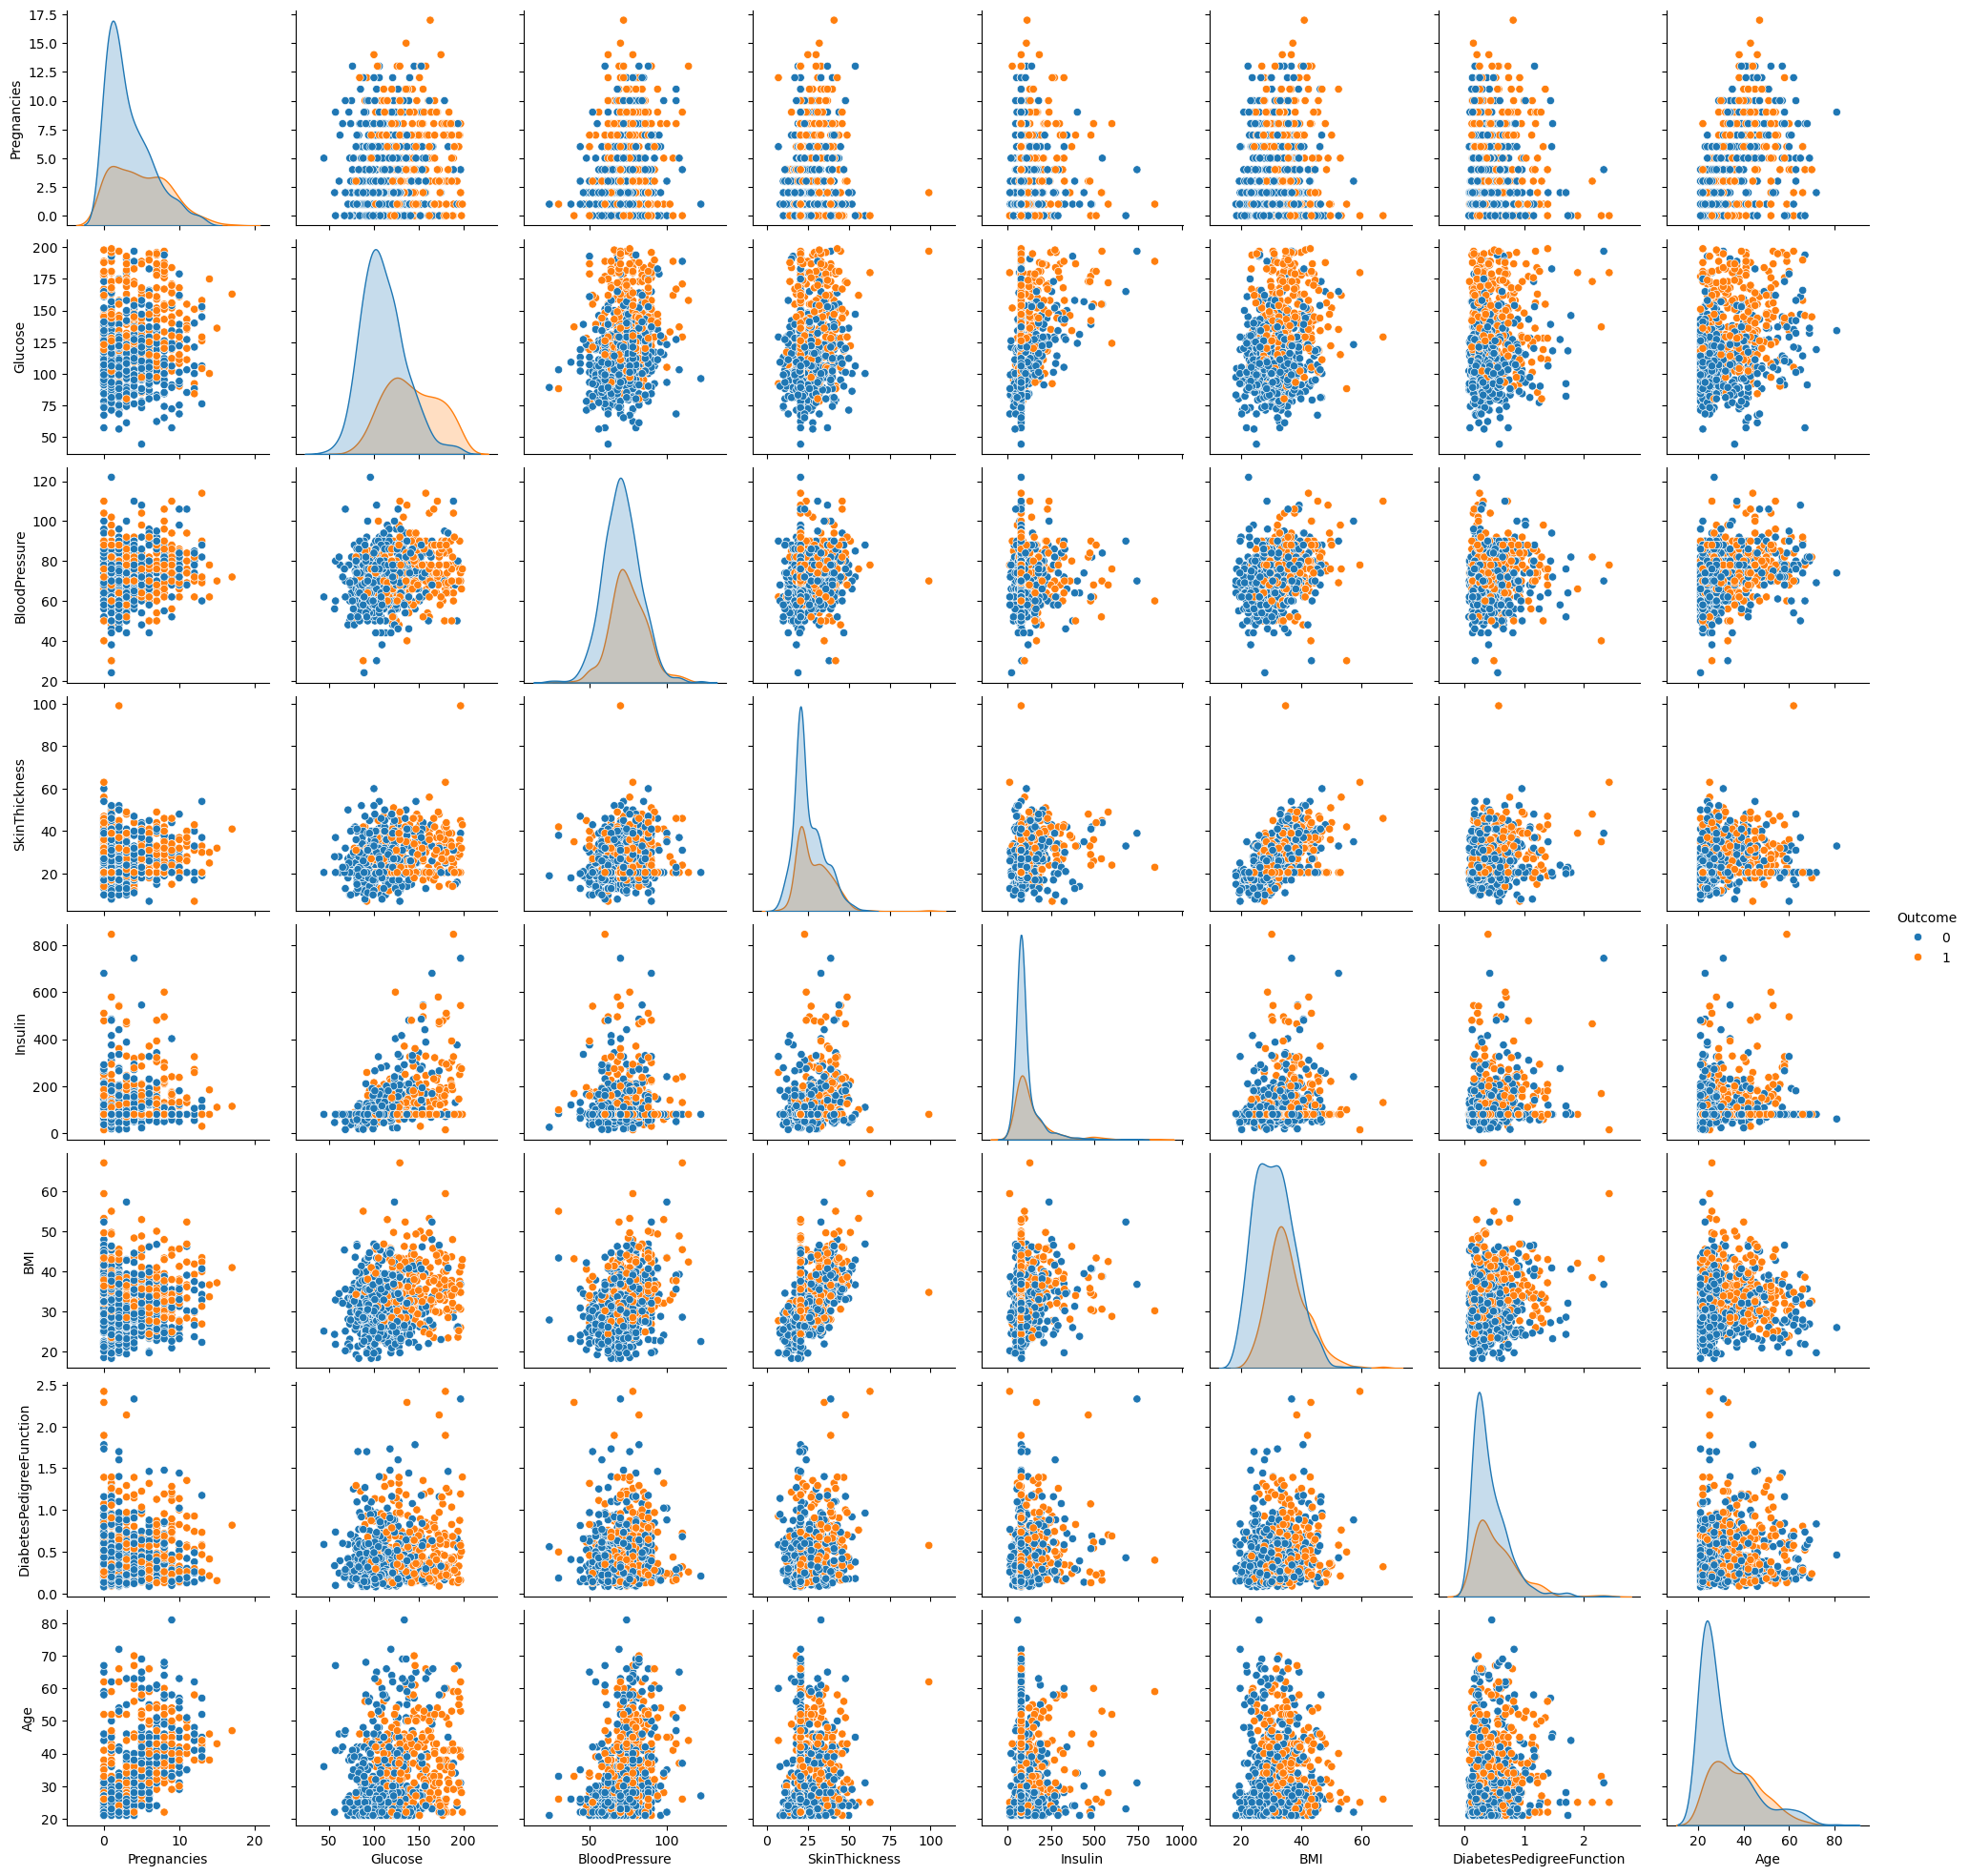

In [40]:
import seaborn as sns
sns.pairplot(df, hue='Outcome')
plt.show()

The correlation in value with 1 and -1 as the maximum value and minimum value respectively are as below. Positive value means it is positively correlated and vice versa.

In [41]:
corr_matrix = df.corr()
corr_mat_outcome = corr_matrix.Outcome.sort_values(ascending = False)
corr_mat_outcome

Outcome                     1.000000
Glucose                     0.492908
BMI                         0.312254
Age                         0.238356
Pregnancies                 0.221898
Insulin                     0.179185
SkinThickness               0.175026
DiabetesPedigreeFunction    0.173844
BloodPressure               0.162986
Name: Outcome, dtype: float64

### Feature Scaling and Feature Selection



The initial splitting to train and test dataset include a parameter set to **stratify=y**, which in this context, stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.

We will standardize the features using StandardScaler class from the scikit-learn's preprocessing module for our classifiers except for Random Forest as scaling doesn't affect its performance. The standardization is done inside the sequential backward selection (SBS) algorithm using python instead of using scikit-learns's feature selection.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['Outcome'], axis=1)
y = df.Outcome

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y , random_state=1)

# Stratification result sample
print('Labels counts in y: ', np.bincount(y))
print('Labels counts in y_train: ', np.bincount(y_train))
print('Labels counts in y_test: ', np.bincount(y_test))

# sc = StandardScaler()
# X_train_std = sc.fit_transform(X_train)


Labels counts in y:  [500 268]
Labels counts in y_train:  [350 187]
Labels counts in y_test:  [150  81]


In [43]:
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import combinations

class SBS:
    def __init__(self,estimator, k_features, scoring = accuracy_score, test_size = 0.25, random_state = 1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.features_ = None
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X, y):
        
        X_train, X_test, y_train,y_test = \
            train_test_split(X, y, test_size = self.test_size, random_state = self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim)) # underscore at the end signals that this attribute is 
        # created by the fit method and is not a parameter set when initializing the class.'''
        self.subsets_= [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features: #loop for as long as the desired k features is not achieved
            subsets =[]
            scores = []
            
            for p in combinations(self.indices_, dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test,p)
                #store each combination's score
                scores.append(score)
                #store the combination index
                subsets.append(p)
                
            best = np.argmax(score)
            self.indices_ = subsets[best]
            self.scores_.append(scores[best])
            self.subsets_.append(self.indices_)
            dim -= 1

        return self
                
    def transform(self, X, best=True):
        """
        Transform X to select features.
        If best=True then select features corresponding to the subset with the highest score
        if best=False then select the final selected features"""
        if best:
            #find subset with highest score
            best_idx = np.argmax(self.scores_)
            best_features = self.subsets_[best_idx]
            return X[:,best_features]
        else:
            #return columns of X corresponding to the final selected features.
            return X[:,self.indices_]


    def _calc_score(self, X_train, y_train, X_test, y_test, indices ):
        self.estimator.fit(X_train[:,indices], y_train)
        y_predict = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_predict)
        return score


Now, let's see SBS implementation using logistic classifier from scikit-learn and plot the accuracy against the number of the features:

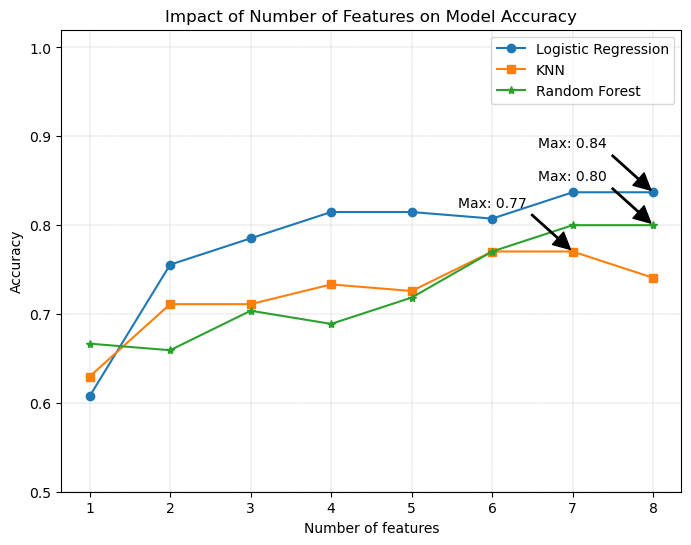

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(C=1.0, solver = "lbfgs")
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=25, random_state=1,n_jobs=2)
classifiers = [("Logistic Regression", lr), ("KNN", knn),("Random Forest", rf)]
markers = ['o','s','*']

# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(8,6))

for idx,(name,clf) in enumerate(classifiers):
    #initialize scaler
    sc = StandardScaler()
    # apply feature scaling on classifier that are not random forest eventhough -
    # -applying it on random forest classifier will have no change in the performance
    if 'forest' not in name.lower():
        # print(name.lower())
        sc.fit(X_train)
        X_train = sc.transform(X_train)
        X_test = sc.transform(X_test)
    
    sbs = SBS(clf, k_features = 1)
    sbs.fit(X_train, y_train)

    # plotting performance of feature subsets
    k_feat = [len(k) for k in sbs.subsets_]
    ax.plot(k_feat, sbs.scores_, marker=markers[idx], label=name)

    # Annotate the highest point
    max_score = max(sbs.scores_)
    max_idx = np.argmax(sbs.scores_)  
    ax.annotate(f'Max: {max_score:.2f}', 
             xy=(k_feat[max_idx], max_score), 
             xytext=(k_feat[max_idx]-1, max_score+0.05),
             arrowprops=dict(facecolor='black', shrink=0.05, width= 1),
             ha='center')

ax.set_ylim([0.5, 1.02])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of features')
ax.set_title('Impact of Number of Features on Model Accuracy')
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.2)
ax.legend()

plt.show()

The plot illustrates the impact of the selected features on the classification accuracy for three models: Logistic Regression, K-Neareast Neighbors (KNN) and Random Forest using the SBS algorithm. 

-   Logistic Regression achieves its highest accuracy when all features are included which indicate that each features are important for the prediction

-   KNN also shows its best performance with more features, but overall accuracy is slightly lower compared to Logistic Regression.

-   Random Forest also show better performance as the feaeture grows but still Slightly lower than Logistic Regression.

-   The annotated points on the plot highlight the maximum accuracy achieved by each classifier abd the corresponding number of features used.


This comparison demonstrates that, for this dataset, Logistic Regression outperforms KNN and benefits from utilizing all available features. 

But we have to keep in mind that this dataset is considered as a small dataset with less than 1k rows and is very susceptible to randomness. Hence we set the random state = 1 when we split the dataset into training and test subsets, and when we split the training dataset further into a training and validation subset. 

### Select Features for Final Model

Here, we proceed with the Logistic Regression classifier using the subset of features that achieved the highest accuracy during feature selection.

In [45]:
# Fit SBS for Logistic Regression and store it
lr = LogisticRegression(penalty='l2', C=1.0, solver = "lbfgs")
sbs_lr = SBS(lr, k_features = 1)
sbs_lr.fit(X_train, y_train)

# Transform the dataset using the best subset of features
X_train_best = sbs_lr.transform(X_train, best=True)
X_test_best = sbs_lr.transform(X_test, best=True)

#Scaling train test set
sc= StandardScaler()
X_train_std = sc.fit_transform(X_train_best)
X_test_std = sc.transform(X_test_best)

#Train final Logistic Regression model on the selected features
lr.fit(X_train_std, y_train)


LogisticRegression()

Evaluation metric using accuracy:

In [46]:
from sklearn.metrics import classification_report

y_pred = lr.predict(X_test_std)
print("Training accuracy:", lr.score(X_train_std, y_train))
print("Test accuracy:", lr.score(X_test_std, y_test))

print(classification_report(y_test, y_pred))

Training accuracy: 0.7821229050279329
Test accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       150
           1       0.70      0.52      0.60        81

    accuracy                           0.75       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



The test accuracy is slightly lower than the training accuracy. However they are quite far lower than when we were doing the feature selection process. Next we will try to optimize them for better results.

## Work in Progress

### Model Optimization


Let's try to improve this logistic regression model by tuning its hyperparameters.

-    use GridSearchCV or RandomizedSearchCV to search for the best C, penalty and solver values

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.01,0.1,1.0,10.0,100.0],
              # 'penalty':['l1','l2'],
              'solver':['liblinear','lbfgs']}

grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_best, y_train)

print('Best parameter: ', grid.best_params_)
print('Best cross-validated accuracy: ', grid.best_score_)

Best parameter:  {'C': 1.0, 'solver': 'liblinear'}
Best cross-validated accuracy:  0.7803392177223952
